*First compiled: May 1, 2017.*

## Analysis of data of [Moignard *et al.*, Nat. Biotechn. (2015)](http://dx.doi.org/10.1038/nbt.3154)

There is a bit more explanation on this example [here](README.md).

This has been published by [Haghverdi *et al.*, Nat. Meth. (2016)](http://dx.doi.org/10.1038/nmeth.3971) together with a Matlab implementation of Diffusion Pseudotime. The data is from [Moignard *et al.*, Nat. Biotechn. (2015)](http://dx.doi.org/10.1038/nbt.3154).

In [1]:
%config InlineBackend.figure_formats = ['png2x']  # for vector graphics quality, set to svg
import numpy as np
import scanpy.api as sc

sc.settings.verbosity = 3                # show some output
sc.settings.set_dpi(80)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2 on 2017-07-24 00:31.


This is single-cell qPCR data. It's already on a logrithmic scale and pretty low-dimensional. We do not have to perform extensive preprocessing.

1. Filter out a few genes.
2. Choose a 'root cell'.                                                                                                                                                           
3. Define groupnames by inspecting cellnames.                                                                                                                                    

In [2]:
filename = 'data/moignard15/nbt.3154-S3.xlsx'
backup_url = 'http://www.nature.com/nbt/journal/v33/n3/extref/nbt.3154-S3.xlsx'
adata = sc.read(filename, sheet='dCt_values.txt', cache=True, backup_url=backup_url)
# filter out genes as done by Haghverdi et al. (2016)
removed_genes = np.in1d(adata.var_names, ['Eif2b1', 'Mrpl19', 'Polr2a', 'Ubc'])
adata = adata[:, ~removed_genes]  # retain non-removed genes
# choose root cell as in Haghverdi et al. (2016)
adata.add['iroot'] = 532  # note that in Matlab/R, counting starts at 1
# annotate with Moignard et al. (2015) experimental cell groups
groups_names = ['HF', 'NP', 'PS', '4SG', '4SFG']
# annotate each sample/cell
adata.smp['exp_groups'] = [
    next(gname for gname in groups_names if sname.startswith(gname))
    for sname in adata.smp_names]
# fix the order and colors of names in "groups"
adata.add['exp_groups_names'] = groups_names
adata.add['exp_groups_colors'] = ['#D7A83E', '#7AAE5D', '#497ABC', '#AF353A', '#765099']

reading file ./write/data/moignard15/nbt.3154-S3.h5


Perform a Diffusion Pseudotime analysis.

In [3]:
sc.tl.dpt(adata, n_branchings=1, n_neighbors=5, knn=False)

initializing data graph with `n_neighbors=5`
    using data matrix X directly for building graph (no PCA)
computing Diffusion Map with 10 components
    eigenvalues of transition matrix
    [ 1.     0.992  0.974  0.887  0.861  0.826  0.781  0.76   0.734  0.73 ]
perform Diffusion Pseudotime analysis
    detect 1 branching
    do not consider groups with less than 39 points for splitting
    branching 1: split group 0
finished (0:00:01.153) and added
    "dpt_pseudotime", the pseudotime (adata.smp),
    "dpt_groups", the branching subgroups of dpt (adata.smp)
    "dpt_order", order according to groups and increasing pseudtime (adata.smp)


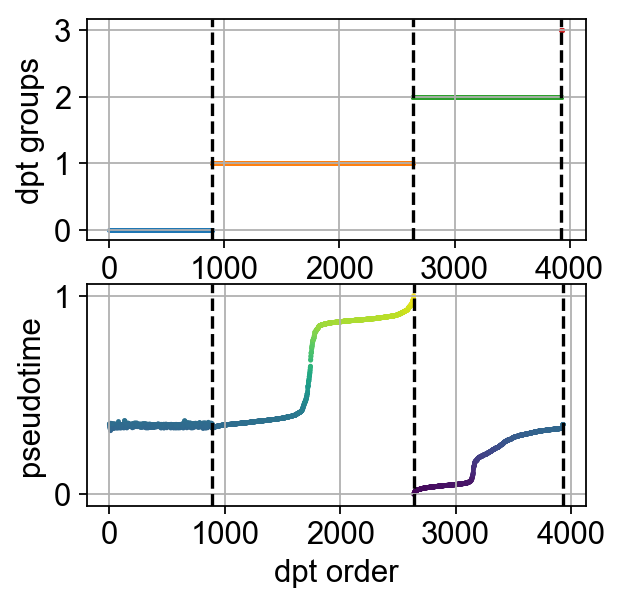

In [4]:
sc.pl.dpt_groups_pseudotime(adata)

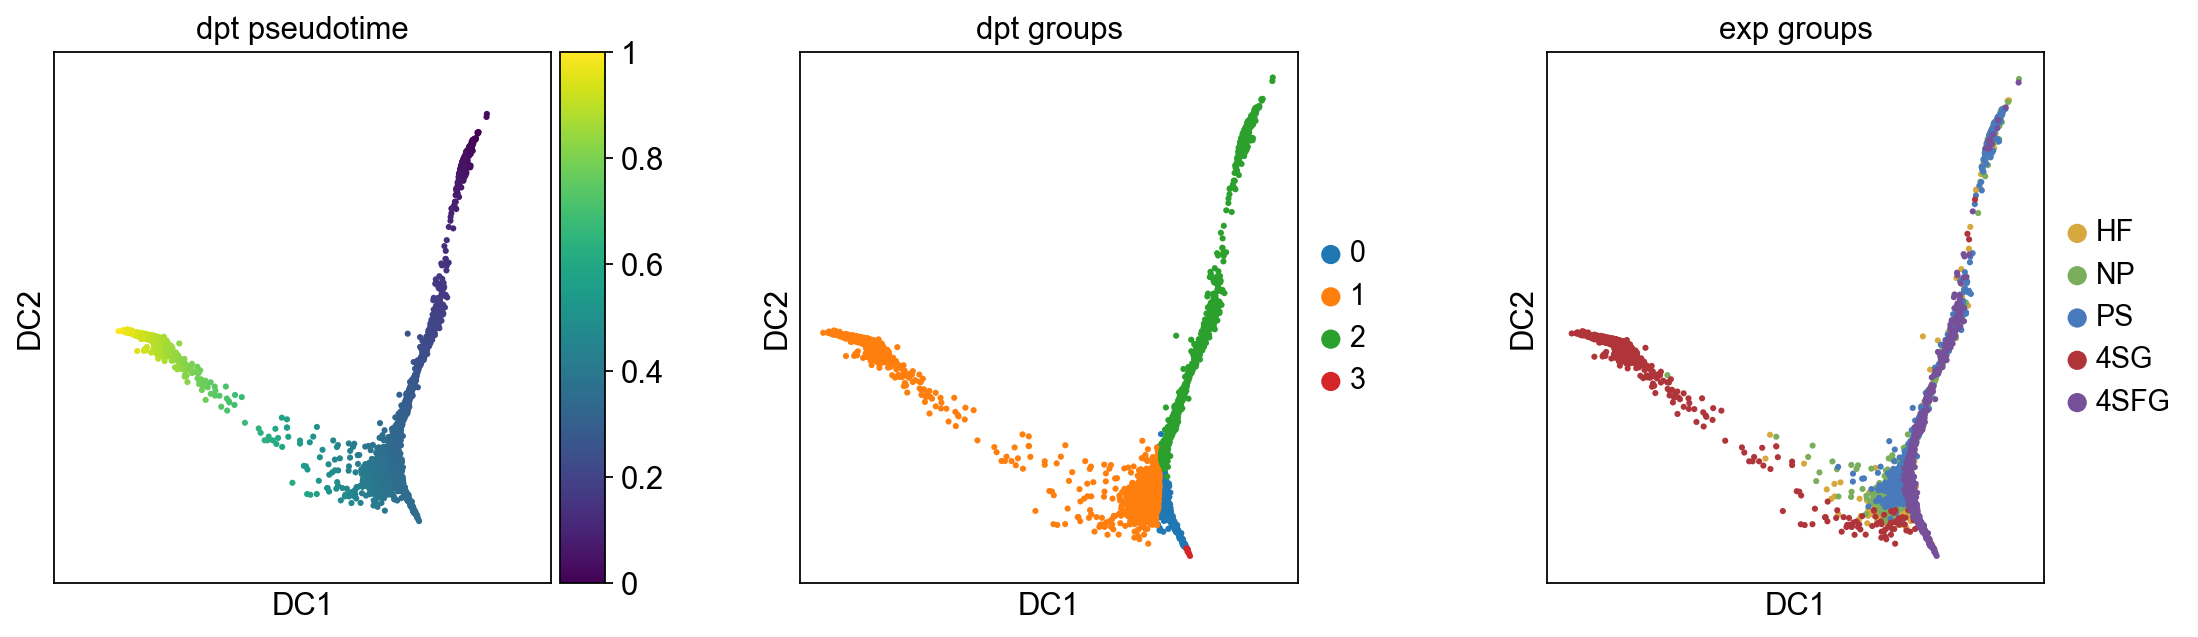

In [5]:
axs = sc.pl.scatter(adata, basis='diffmap', color=['dpt_pseudotime', 'dpt_groups', 'exp_groups'])

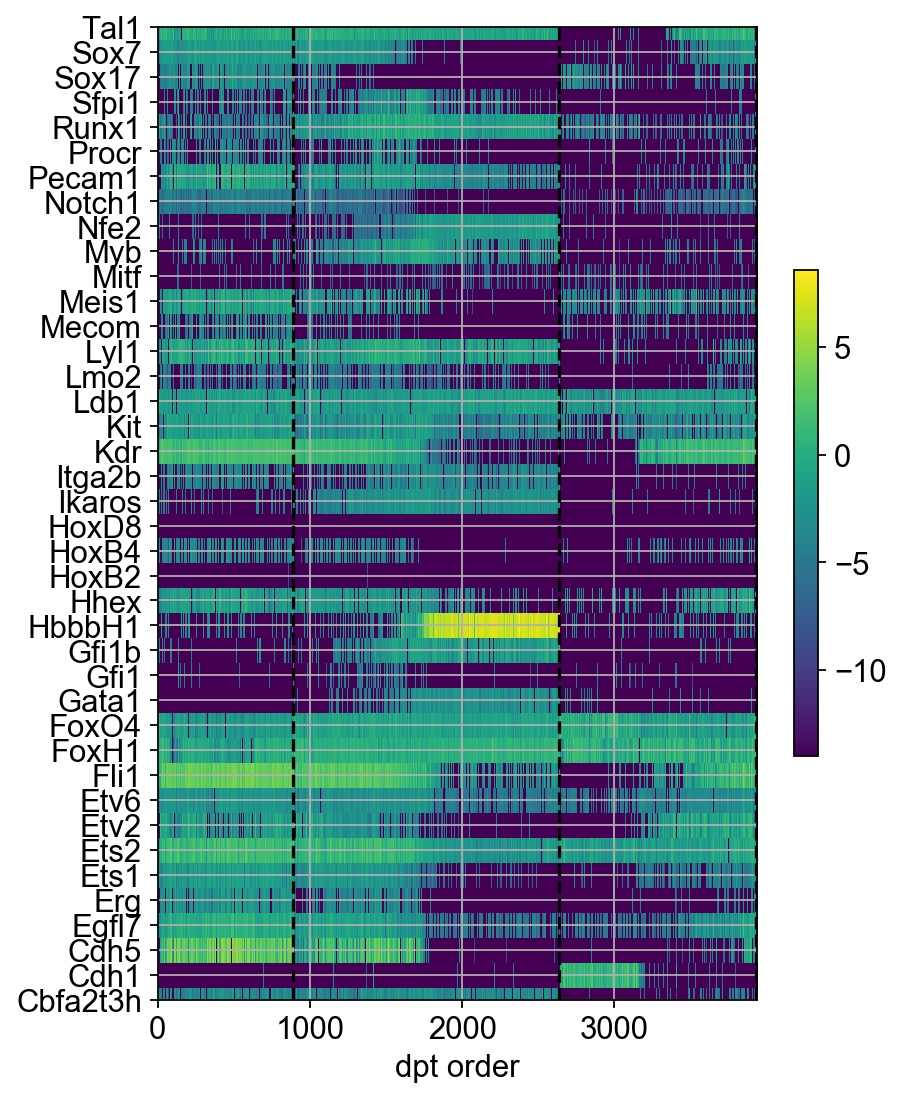

In [6]:
sc.pl.dpt_timeseries(adata)

We can annotate the cell groups as follows.

In [7]:
adata.add['dpt_groups_names'] = ['undecided/endothelial', 'erythrocytes', 'trunk', 'endothelial'] # optional

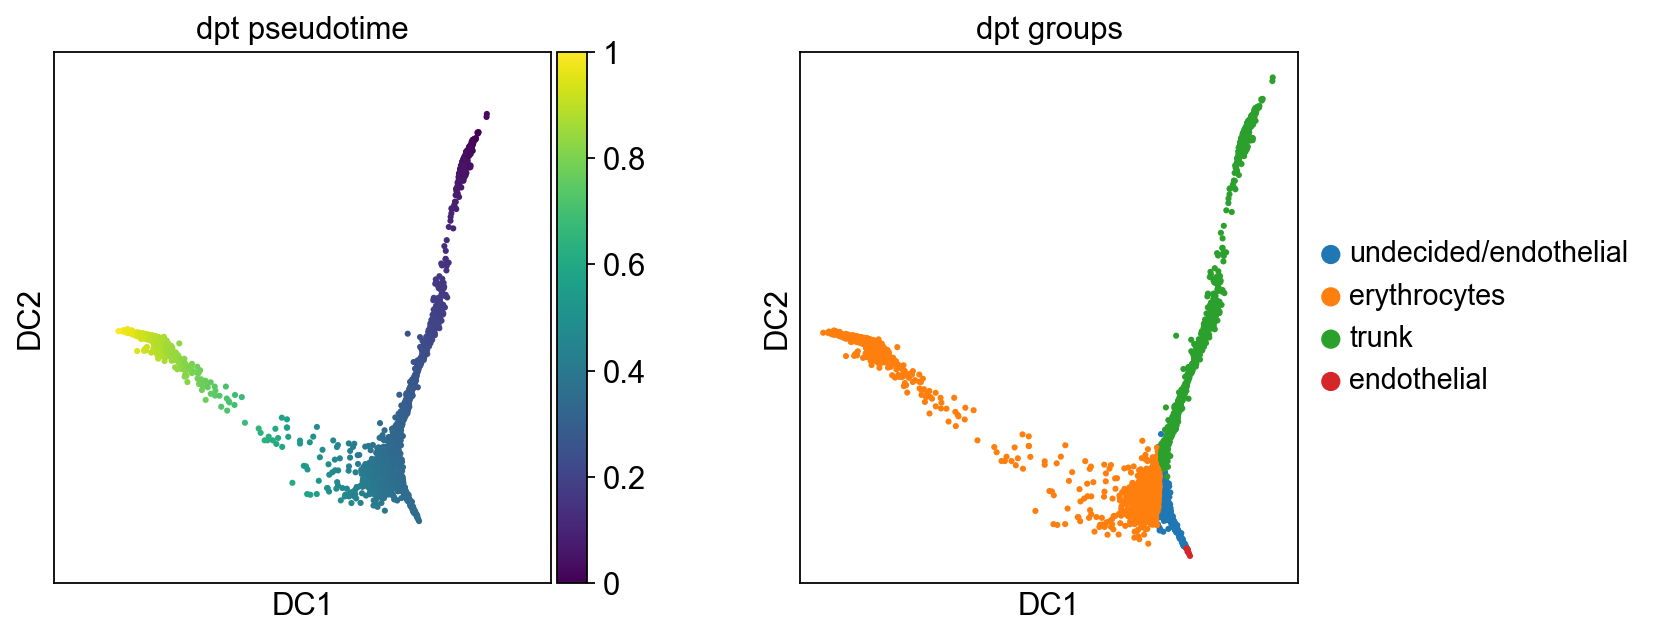

In [8]:
sc.pl.dpt_scatter(adata)

Save the results, for instance, as either as 'hdf5' or 'csv'.

In [10]:
sc.write('moignard15', adata)
sc.write('./write/moignard15.csv', adata)

writing ./write/moignard15.h5
writing csv files to ./write/moignard15/
